Data prepration

In [4]:
import pandas as pd
import numpy as np

# Sample data
np.random.seed(42)
n_samples = 200
data = pd.DataFrame({
    'BMI': np.random.normal(25, 5, n_samples),
    'Exercise': np.random.randint(0, 6, n_samples),  # 0 to 5 times/week
    'EatingHabits': np.random.choice(['poor', 'average', 'good'], n_samples),
    'Risk': np.random.choice(['low', 'medium', 'high'], n_samples)
})


Processing

In [5]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
data['EatingHabits'] = label_enc.fit_transform(data['EatingHabits'])  # poor:0, avg:1, good:2
data['Risk'] = label_enc.fit_transform(data['Risk'])  # low:1, medium:2, high:0 (example)


Train / Test slip

In [6]:
from sklearn.model_selection import train_test_split

X = data[['BMI', 'Exercise', 'EatingHabits']]
y = data['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Evolution Matrix + Confusion Matrix

Accuracy: 0.20
Precision: 0.27
Recall: 0.20

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.19      0.26        21
           1       0.13      0.25      0.17         8
           2       0.13      0.18      0.15        11

    accuracy                           0.20        40
   macro avg       0.22      0.21      0.20        40
weighted avg       0.27      0.20      0.21        40



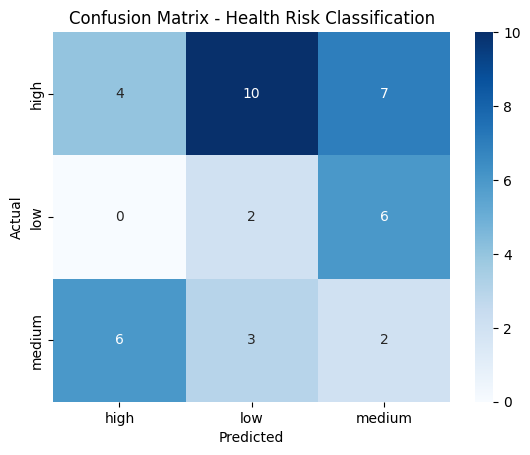

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # multi-class
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Health Risk Classification")
plt.show()


# New section